# POI merging and treatment

in this nb the poi file are going to be aggragate and cleaned, if its possible its going to be find a new source for slope values and recalcualte the diversity index.

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
folder_path = "/mnt/raid/matteo/POI"
data_path = "/home/s232713/data/POI"

csv_files = glob.glob(os.path.join(folder_path, "POI_traj_touched/*.csv"))
print(f"Found {len(csv_files)} CSV files.")

df_poi = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)


df_poi.to_csv(os.path.join(folder_path, "POI_combined.csv"), index=False)

print("Total rows:", len(df_poi))

Found 13 CSV files.
Total rows: 12906


In [3]:
df_poi.head()

,GRID_ID,lat,lon,Diversity_Index,Slope,arts_entertainment_events,buildings_facilities,poi_amenity,food_drink,public_services,...,beauty_personal_health,poi_shop,poi_leisure,poi_tourism,greenery_natural,poi_natural,poi_buiding,poi_historic,tourism_leisure,water_body
0,197251.0,55.878985,12.388617,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
1,197253.0,55.880540,12.388513,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,197254.0,55.881317,12.388461,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,197257.0,55.883649,12.388304,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,197258.0,55.884426,12.388252,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print((df_poi['GRID_ID'].value_counts() == 1).count())

12906


In [5]:
print(df_poi['Diversity_Index'].value_counts())
print(df_poi['Slope'].value_counts())

Diversity_Index
0    12906
Name: count, dtype: int64
Slope
0    12906
Name: count, dtype: int64


In [6]:
# use this one only if the value before are all 0
df_poi = df_poi.drop(['Diversity_Index', 'Slope'], axis=1)

df_poi.to_csv(os.path.join(data_path, "POI_combined.csv"), index=False)

In [7]:
df_poi.head()

,GRID_ID,lat,lon,arts_entertainment_events,buildings_facilities,poi_amenity,food_drink,public_services,miscellaneous_services,poi_transportation,...,beauty_personal_health,poi_shop,poi_leisure,poi_tourism,greenery_natural,poi_natural,poi_buiding,poi_historic,tourism_leisure,water_body
0,197251.0,55.878985,12.388617,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
1,197253.0,55.880540,12.388513,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,197254.0,55.881317,12.388461,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,197257.0,55.883649,12.388304,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,197258.0,55.884426,12.388252,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
print(df_poi.describe())

for col in df_poi.columns:
    missing_count = df_poi[col].isnull().sum()
    if missing_count > 0:
        print(f"Column '{col}' has {missing_count} missing values.")
    else:
        print(f"Column '{col}' has no missing values.")



             GRID_ID           lat           lon  arts_entertainment_events  \
count   12906.000000  12906.000000  12906.000000               12906.000000   
mean   249815.304664     55.742438     12.500142                   0.007438   
std     45447.393243      0.092801      0.092426                   0.101628   
min      8989.000000     55.580797     11.914645                   0.000000   
25%    236772.250000     55.672563     12.469770                   0.000000   
50%    261310.500000     55.707639     12.520489                   0.000000   
75%    283484.750000     55.794763     12.564856                   0.000000   
max    304686.000000     56.092905     12.659326                   4.000000   

       buildings_facilities   poi_amenity    food_drink  public_services  \
count          12906.000000  12906.000000  12906.000000     12906.000000   
mean               1.445297      0.020068      0.617542         0.206106   
std                2.478296      0.346768      1.909786     

| **Category**                  | **Explanation**                                                                                                                                                                                                         |
| ----------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **poi_amenity**               | General public amenities that reflect urban vibrancy, such as cultural centres, libraries, worship places, social spaces and essential services. These locations describe the social and cultural character of an area. |
| **poi_shop**                  | Commercial retail points like supermarkets, clothing shops, kiosks or electronics stores. This captures consumer activity and density of everyday services.                                                             |
| **poi_food**                  | Food and drink venues like restaurants, cafés, pubs, bars or fast food. These reflect social activity patterns and local hospitality density.                                                                           |
| **poi_transportation**        | Transport related infrastructure including stations, bicycle parking, taxi stands, fuel stations and parking. Indicates how connected and mobile an area is.                                                            |
| **poi_leisure**               | Parks, gardens, sports areas, playgrounds and other recreational facilities. Captures access to active leisure and green micro scale environments.                                                                      |
| **poi_tourism**               | Museums, galleries, attractions, viewpoints and tourist hotspots. Indicates cultural and touristic load of the area.                                                                                                    |
| **poi_natural**               | Natural elements like trees, beaches, waterfalls or peaks. Reflects contact with nature and landscape features.                                                                                                         |
| **poi_buiding**               | Buildings such as residential blocks, commercial buildings, hotels or industrial structures. Provides structure of built environment and land use.                                                                      |
| **poi_historic**              | Historic landmarks including memorials, castles, ruins or monuments. Represents cultural heritage and identity of the surroundings.                                                                                     |
| **poi_highway**               | Small scale pedestrian related road infrastructure like footways, cycleways, residential roads or steps. Describes walkability and urban connectivity.                                                                  |
| **food_drink**                | Broader mix of food venues and food related shops, capturing density of consumption and social interaction nodes.                                                                                                       |
| **buildings_facilities**      | Functional buildings or facilities like schools, universities, hospitals, police or sports structures. Indicates institutional presence and public service infrastructure.                                              |
| **roads_transportation**      | Streets, highways, pedestrian roads, bus stops, traffic elements and mobility infrastructure. Reflects exposure to traffic, noise and movement intensity.                                                               |
| **tourism_leisure**           | Tourist accommodations like hostels, guest houses or camping sites. Captures hospitality and temporary population presence.                                                                                             |
| **greenery_natural**          | Forests, grasslands, orchards, farmlands, parks and green spaces. Important for environmental comfort, nature exposure and restorative environments.                                                                    |
| **public_services**           | Civic services such as post offices, banks, town halls, embassies or law related services. Signals administrative and service density.                                                                                  |
| **arts_entertainment_events** | Nightlife, arts and event venues like theatres, casinos, nightclubs or studios. Shows entertainment intensity and social activity patterns.                                                                             |
| **beauty_personal_health**    | Personal care and health services such as hairdressers, beauty salons, clinics or dentists. Indicates wellbeing and service accessibility.                                                                              |
| **miscellaneous_services**    | Other services like coworking spaces, social facilities, currency exchange, recycling or shelters. Captures mixed service functionality not fitting elsewhere.                                                          |
| **water_body**                | Lakes, rivers, streams, ponds and canals. Represents natural water exposure, potentially influential for relaxation or environmental quality.                                                                           |


# visualization

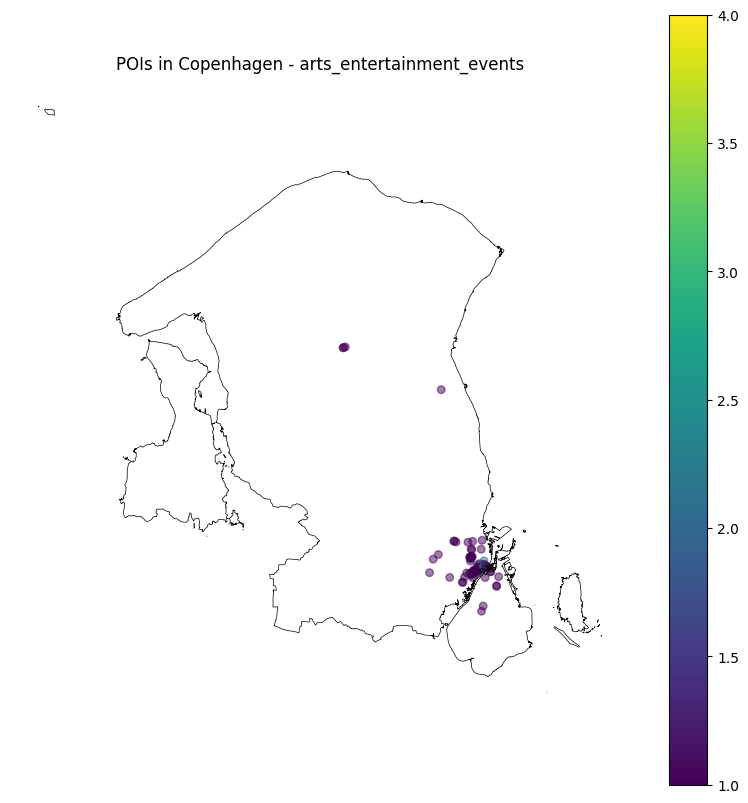

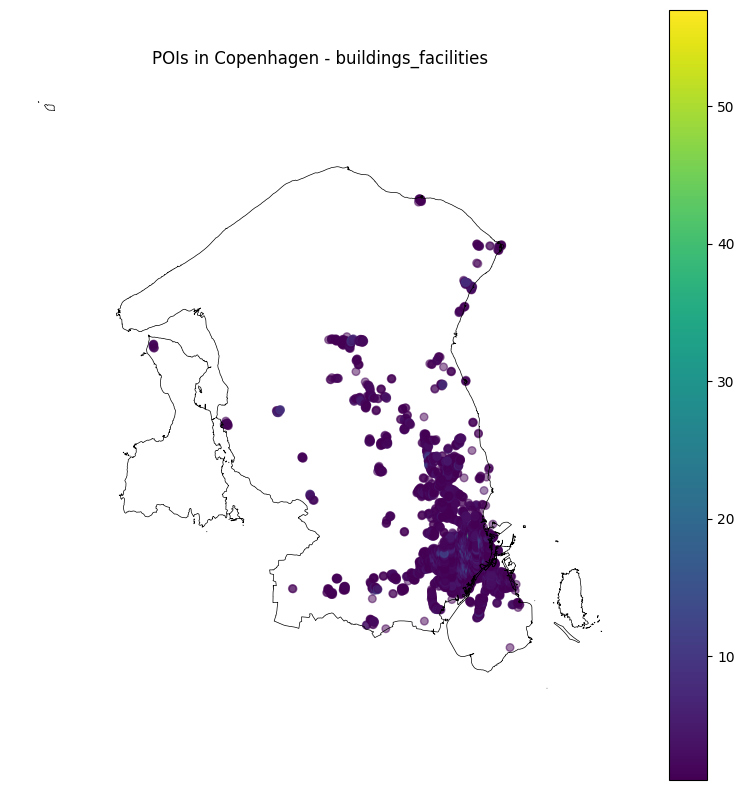

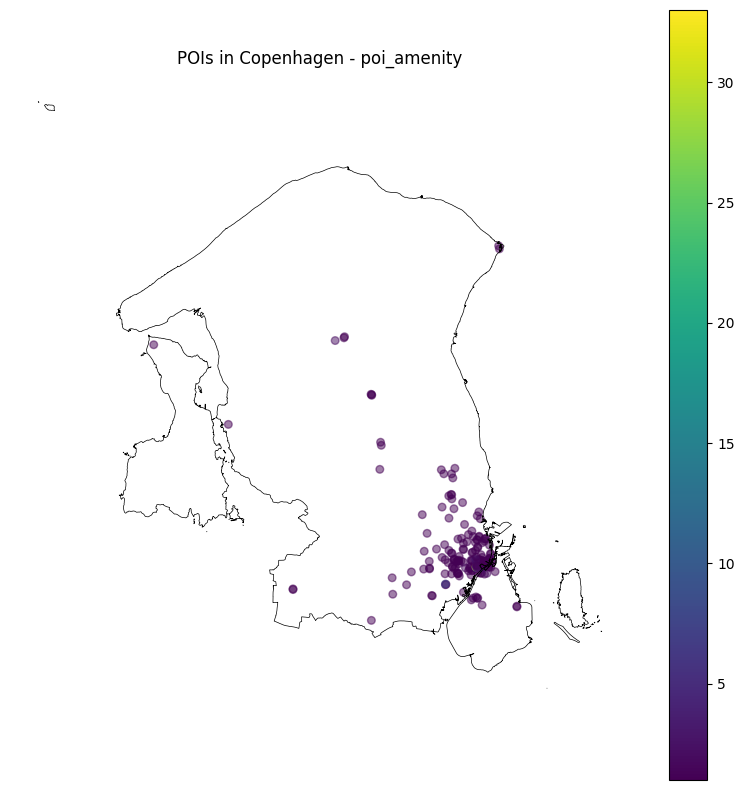

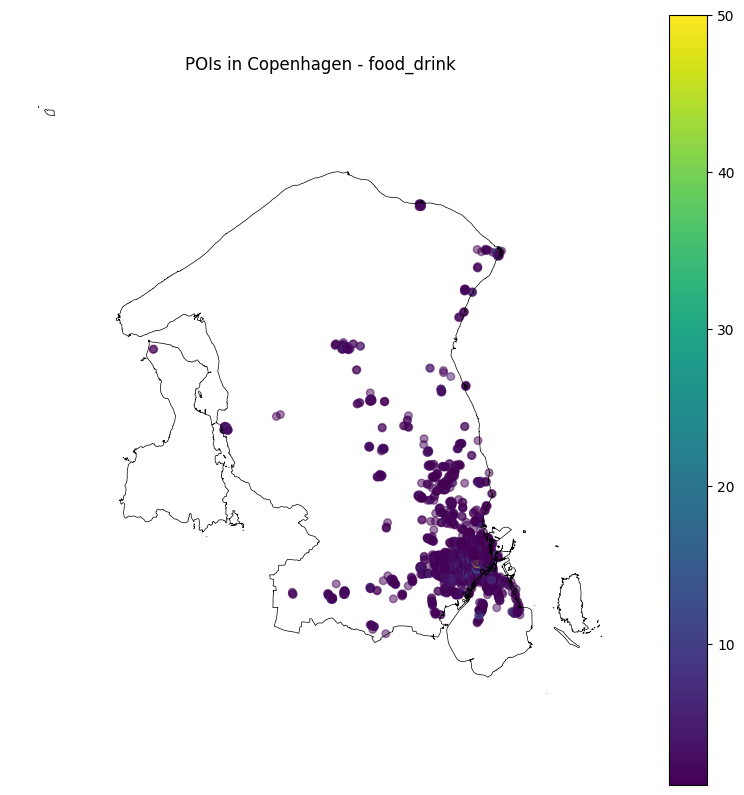

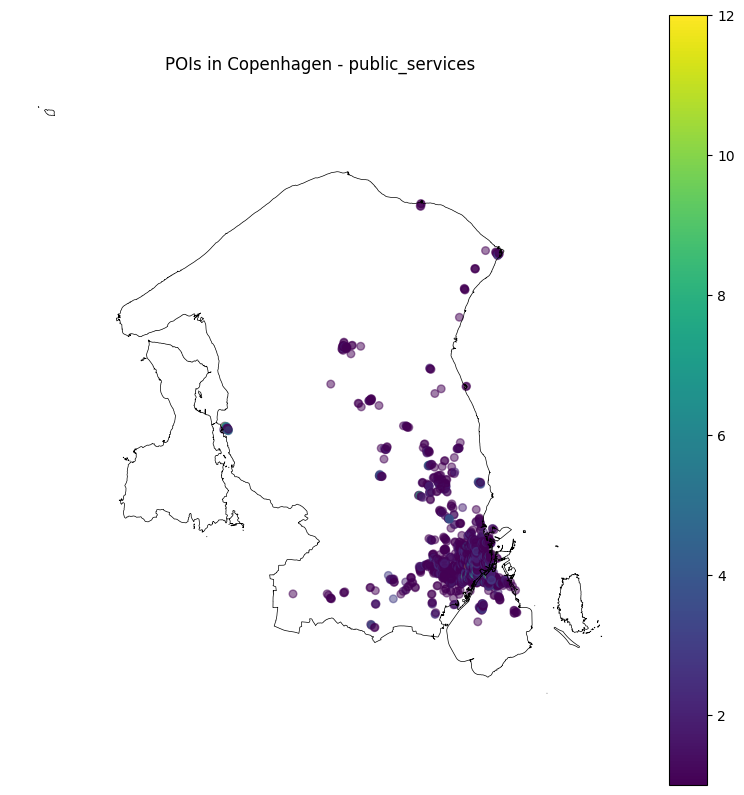

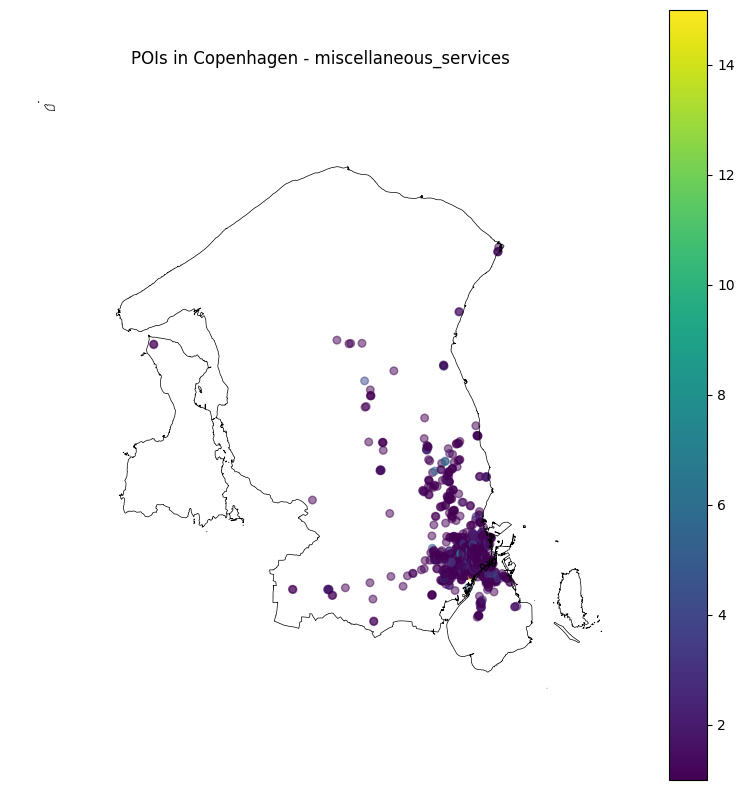

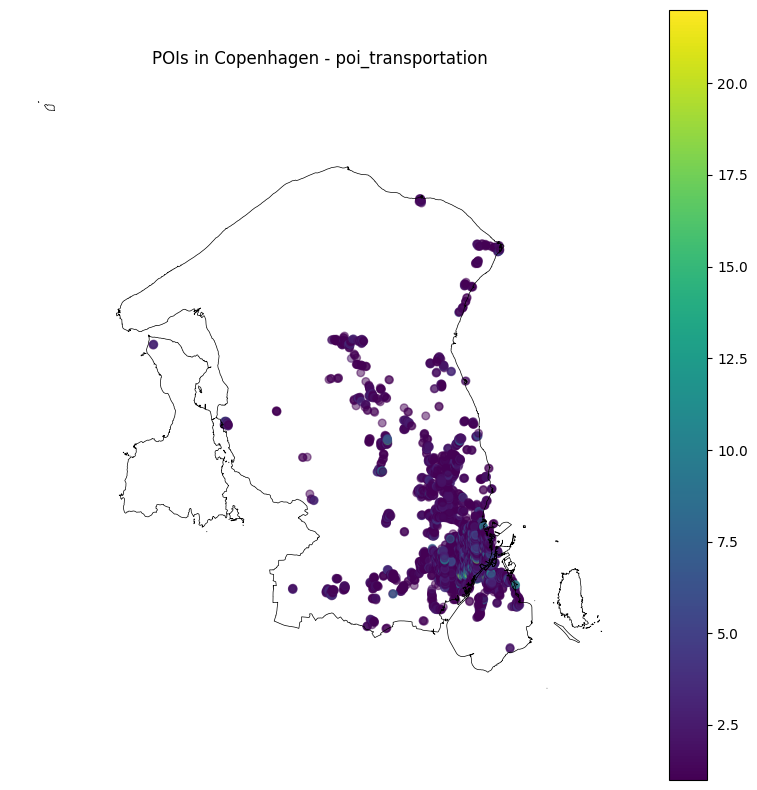

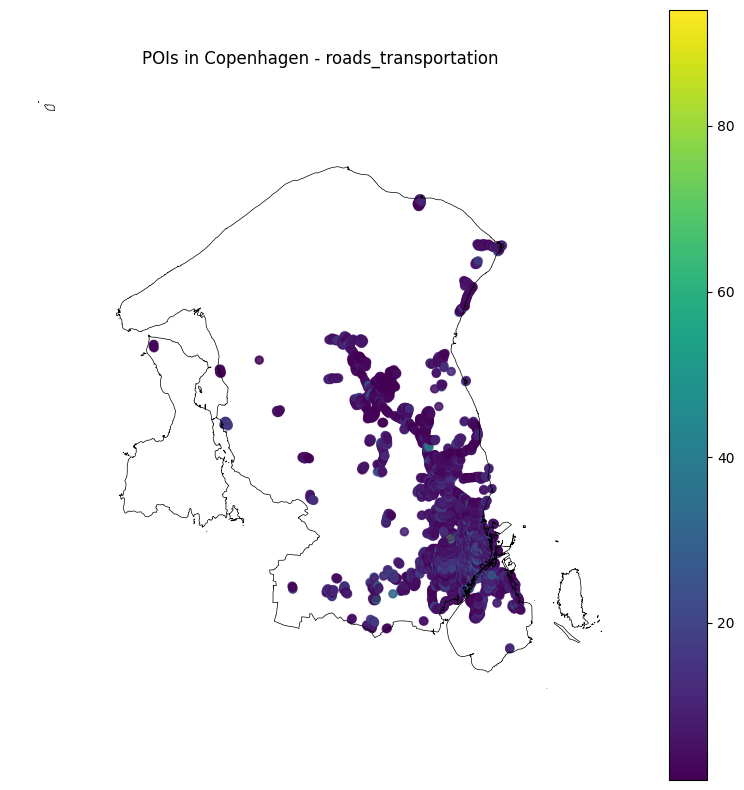

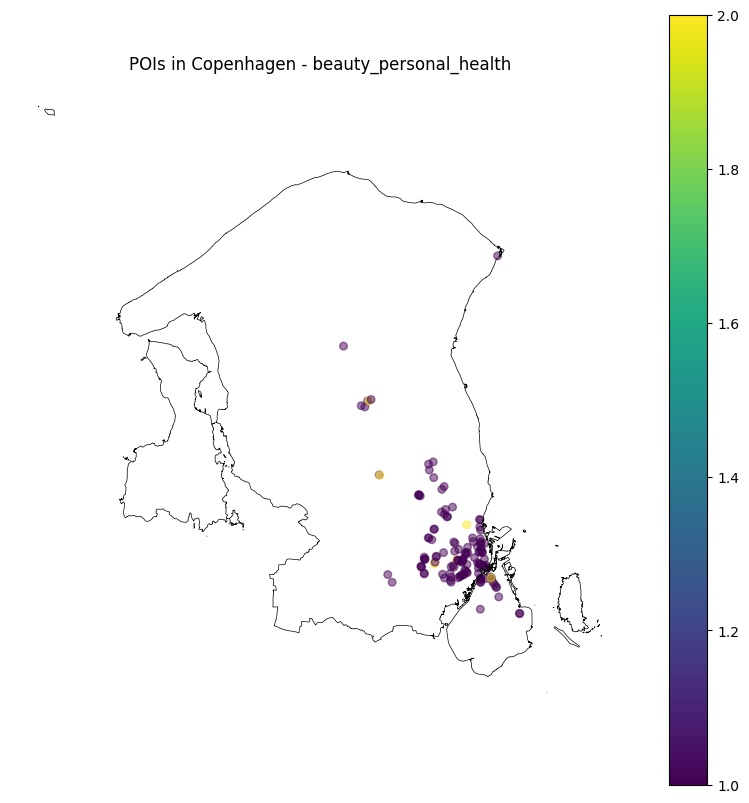

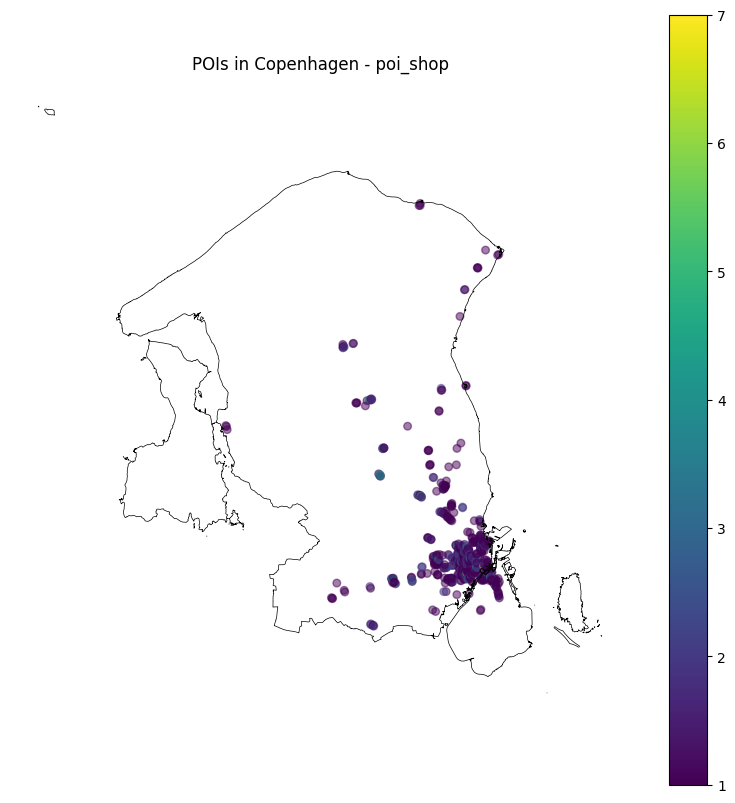

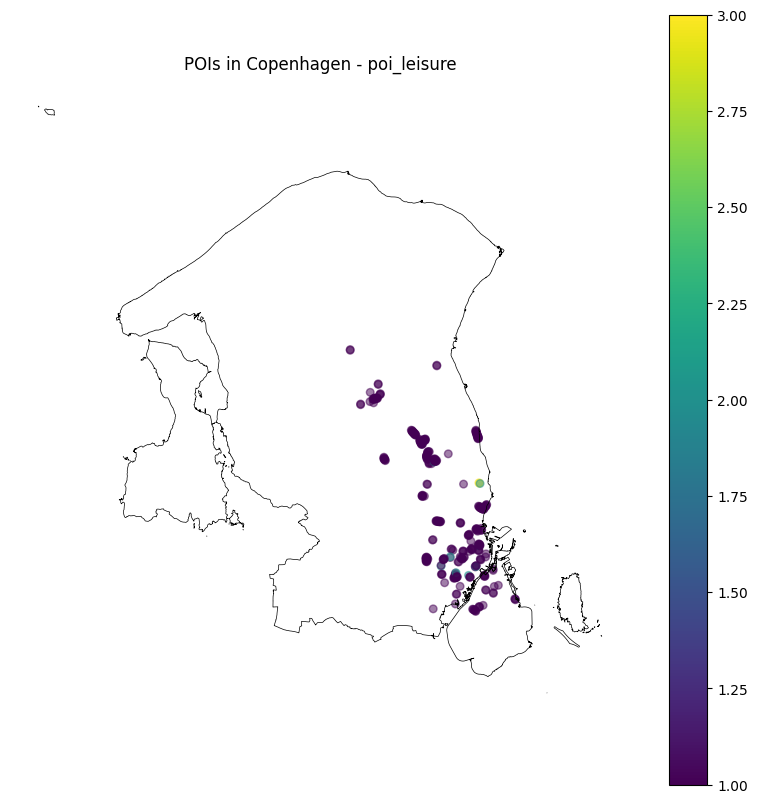

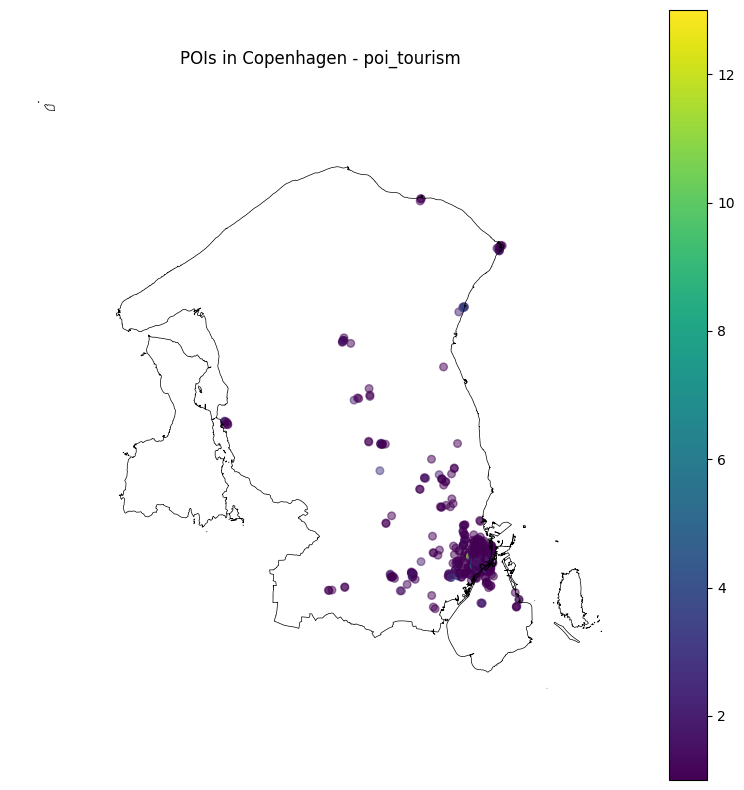

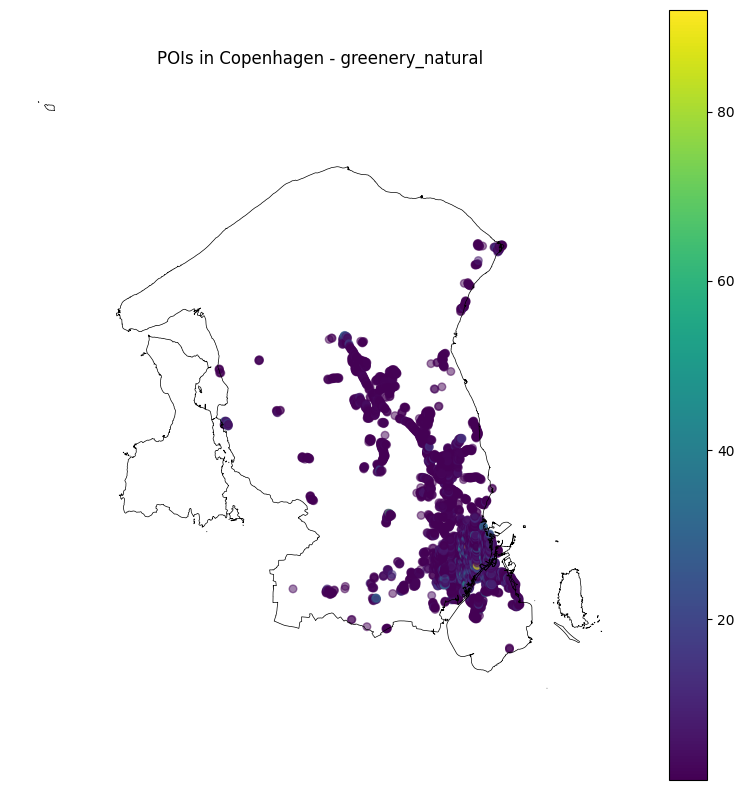

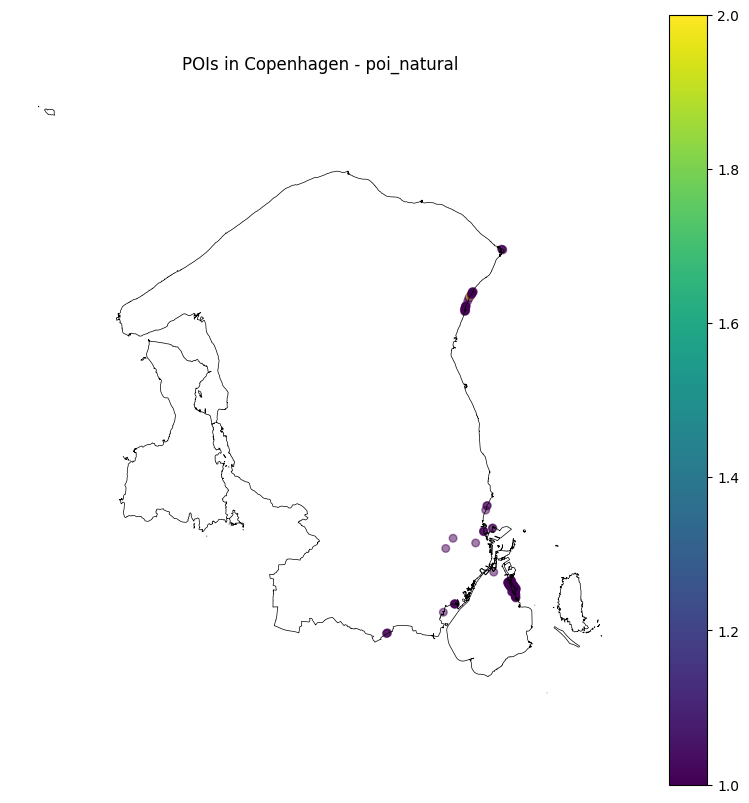

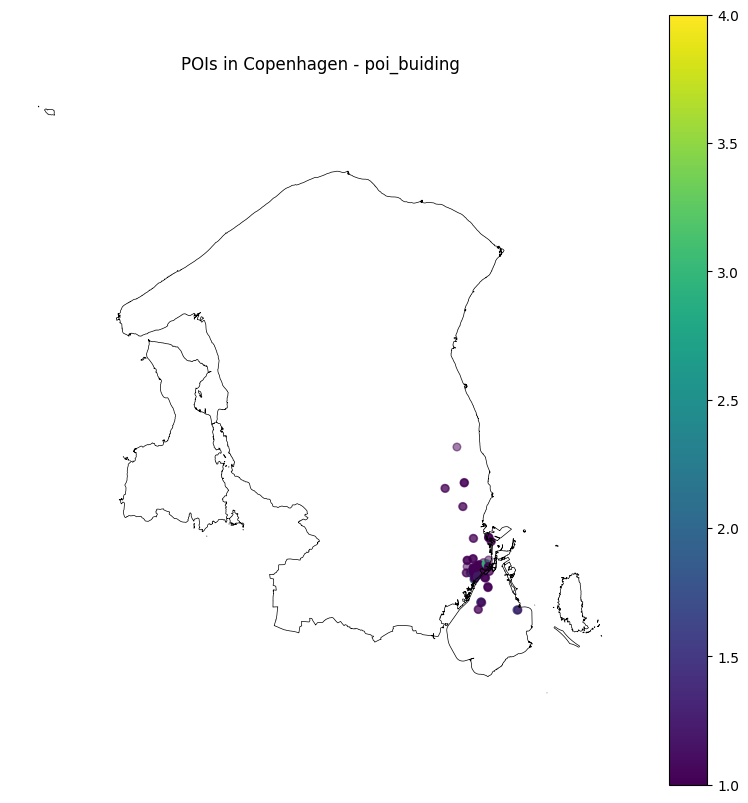

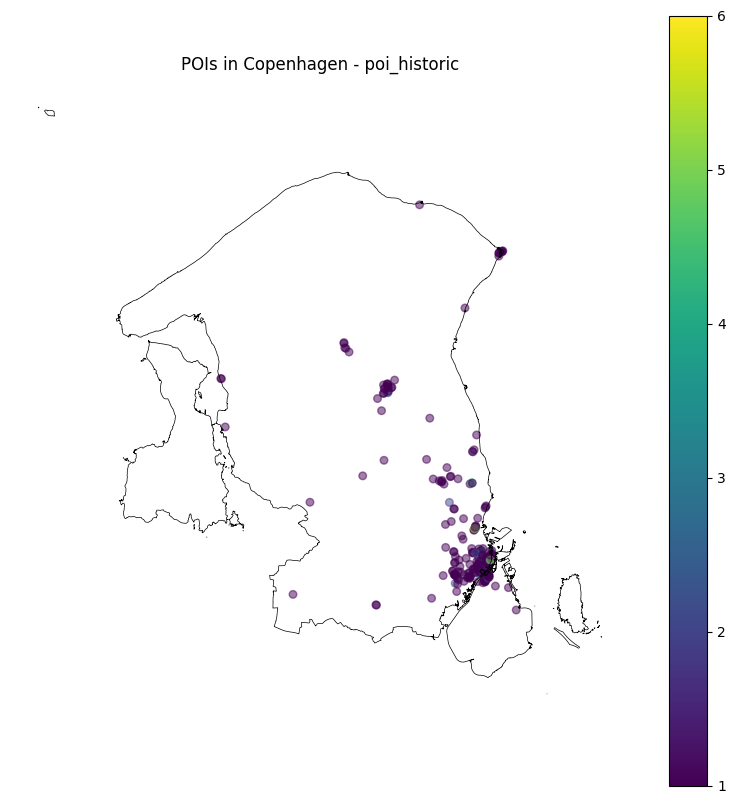

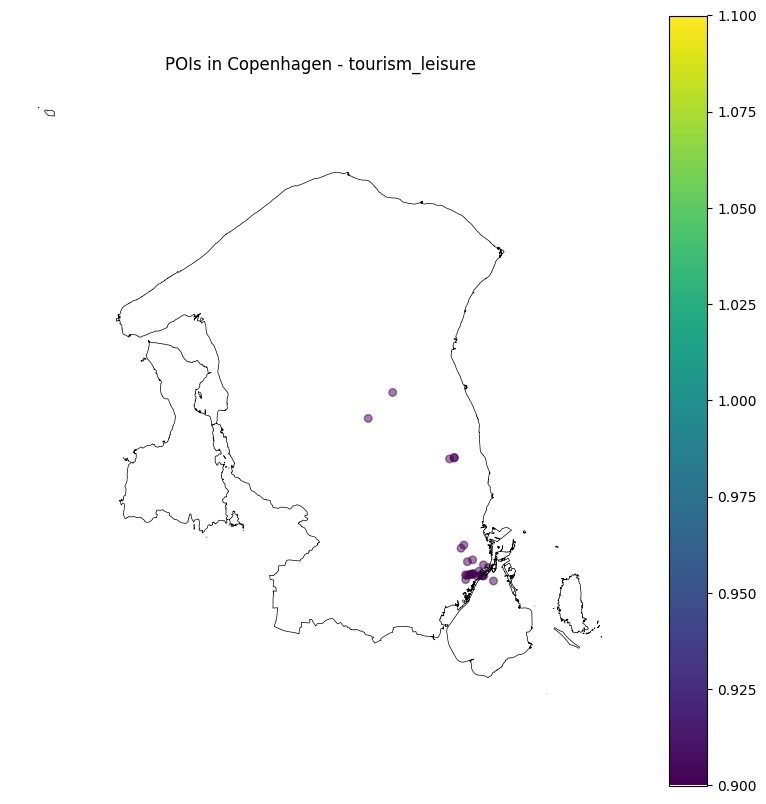

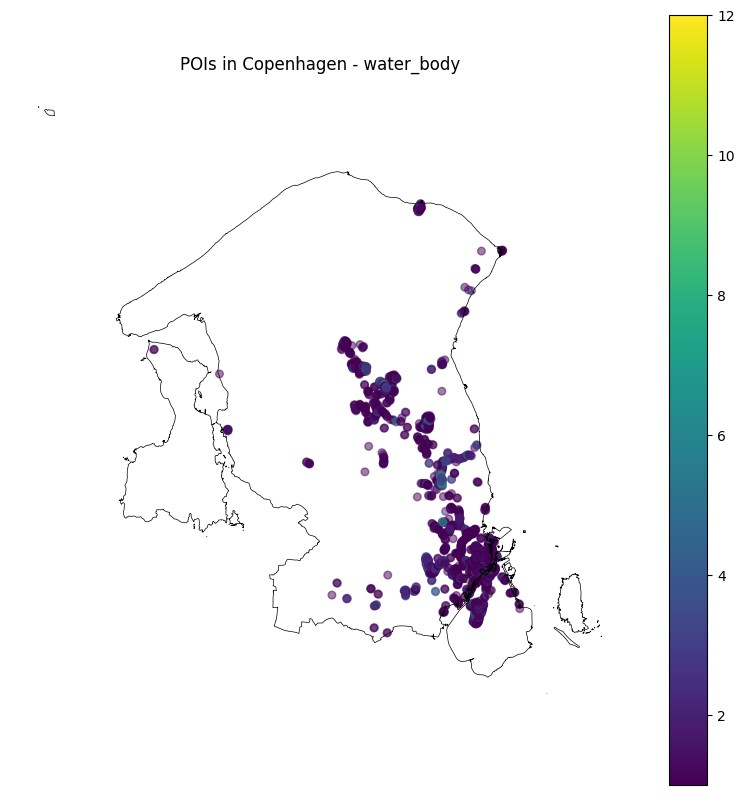

In [10]:
#geodataframe
gdf = gpd.GeoDataFrame(
    df_poi,
    geometry=gpd.points_from_xy(df_poi.lon, df_poi.lat),
    crs="EPSG:4326"   # WGS84
)

cph = gpd.read_file("/home/s232713/data/grid_data/copenhagen_union_boundary.geojson")

gdf = gdf.to_crs(cph.crs) # convert to the same CRS as cph

col = df_poi.columns[3:].tolist()
# plot
gdf[col] = gdf[col].replace(0, np.nan) # replace 0 with NaN for better visualization
for c in col:
    fig, ax = plt.subplots(figsize=(10, 10))
    cph.boundary.plot(ax=ax, color='black', linewidth=0.5)
    gdf.plot(ax=ax, column=c, cmap='viridis', markersize=30, legend=True, alpha=0.5)
    plt.title(f"POIs in Copenhagen - {c}")
    plt.axis('off')
    plt.show()


In [2]:
df_poi = pd.read_csv('/home/s232713/data/POI/POI_combined.csv')
print(df_poi.head())
print(df_poi.describe())

    GRID_ID        lat        lon  arts_entertainment_events  \
0  197251.0  55.878985  12.388617                          0   
1  197253.0  55.880540  12.388513                          0   
2  197254.0  55.881317  12.388461                          0   
3  197257.0  55.883649  12.388304                          0   
4  197258.0  55.884426  12.388252                          0   

   buildings_facilities  poi_amenity  food_drink  public_services  \
0                     0            0           0                0   
1                     0            0           0                0   
2                     0            0           0                0   
3                     0            0           0                0   
4                     0            0           0                0   

   miscellaneous_services  poi_transportation  ...  beauty_personal_health  \
0                       0                   0  ...                       0   
1                       0                   

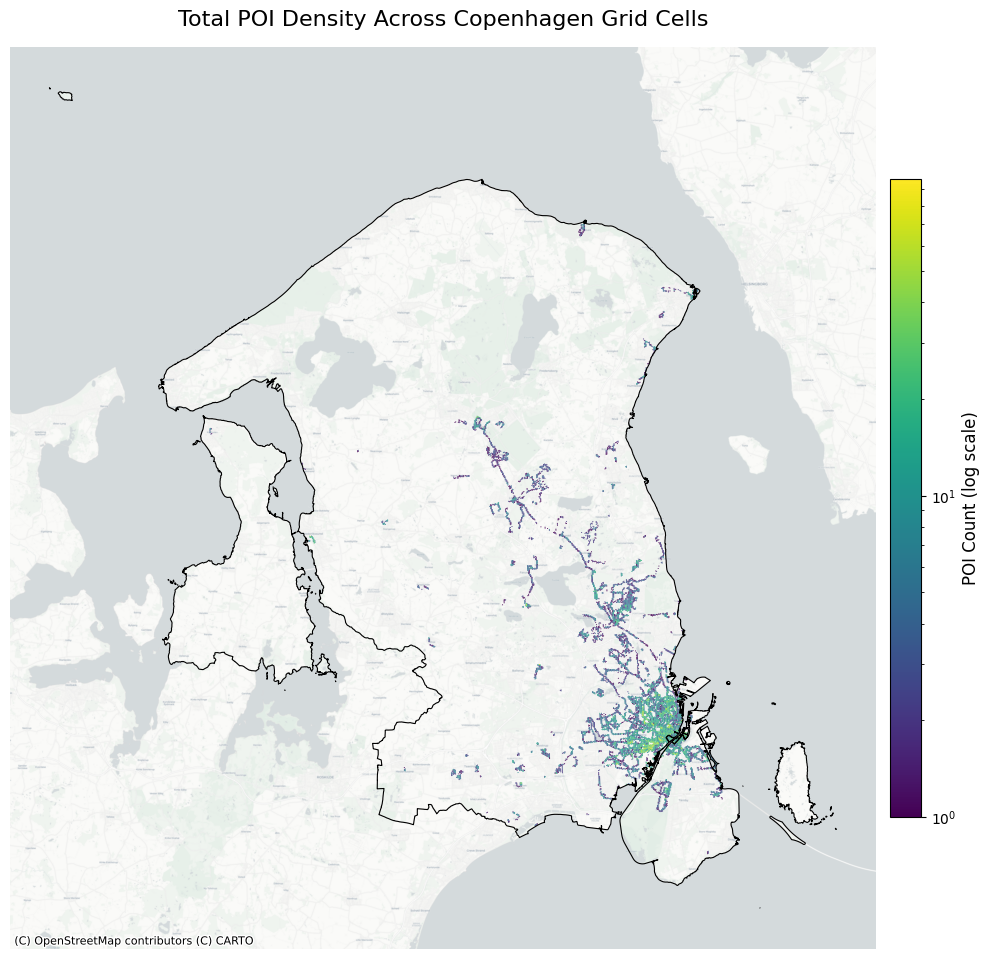

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily as ctx
import numpy as np

# 1. Load grid + boundary
grid_path = "/home/s232713/data/grid_data/cph_hexgrid.geojson"
boundary_path = "/home/s232713/data/grid_data/copenhagen_union_boundary.geojson"

gdf_grid = gpd.read_file(grid_path)
gdf_boundary = gpd.read_file(boundary_path)

# --- FIX CRS mismatch ---
gdf_boundary = gdf_boundary.to_crs(gdf_grid.crs)

# 2. POI total
poi_cols = [
    'arts_entertainment_events', 'buildings_facilities', 'poi_amenity',
    'food_drink', 'public_services', 'miscellaneous_services',
    'poi_transportation', 'beauty_personal_health', 'poi_shop',
    'poi_leisure', 'poi_tourism', 'greenery_natural', 'poi_natural',
    'poi_buiding', 'poi_historic', 'tourism_leisure', 'water_body'
]

df_poi["poi_total"] = df_poi[poi_cols].sum(axis=1)

# 3. Merge + clip
gdf_map = gdf_grid.merge(df_poi[["GRID_ID","poi_total"]], on="GRID_ID", how="left")
gdf_map["poi_total"] = gdf_map["poi_total"].fillna(0)

# --- CLIP NOW WORKS because CRS is aligned ---
gdf_map_clip = gpd.clip(gdf_map, gdf_boundary)

# 4. Reproject to Web Mercator
gdf_map_clip_3857 = gdf_map_clip.to_crs(epsg=3857)
gdf_boundary_3857 = gdf_boundary.to_crs(epsg=3857)

# ------------------------------
# 5. Compute safe LogNorm
# ------------------------------
vals = gdf_map_clip_3857["poi_total"].replace([np.inf, -np.inf], np.nan).fillna(0)
vmax = vals.max()

if vmax <= 1:
    use_log = False
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
else:
    use_log = True
    vmin = max(1, vals[vals > 0].min())
    norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)

# ------------------------------
# 6. Plot
# ------------------------------
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")
ax.axis("off")

cmap = plt.cm.viridis

gdf_map_clip_3857.plot(
    column="poi_total",
    cmap=cmap,
    linewidth=0.25,
    edgecolor="none",
    norm=norm,
    ax=ax
)

gdf_boundary_3857.boundary.plot(
    ax=ax,
    facecolor="none",
    color="black",
    linewidth=0.8
)

plt.title(
    "Total POI Density Across Copenhagen Grid Cells",
    fontsize=16,
    pad=15
)

cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=ax,
    fraction=0.035,
    pad=0.015
)

cbar_label = "POI Count (log scale)" if use_log else "POI Count"
cbar.set_label(cbar_label, fontsize=12)

ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    zoom=12
)

plt.tight_layout()
plt.show()


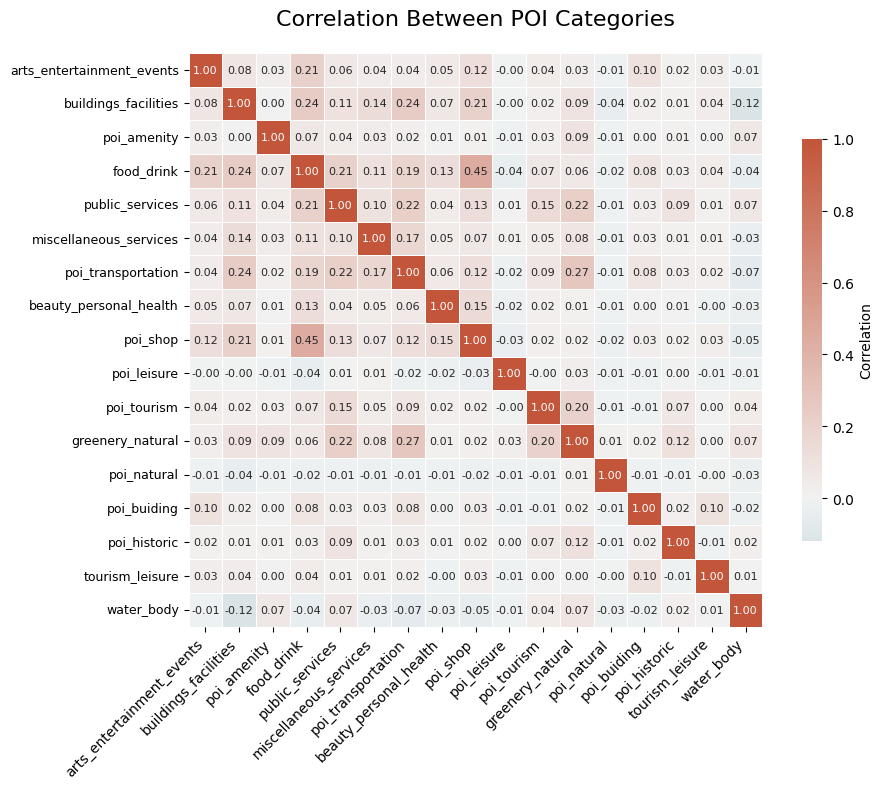

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

poi_cols = [
    'arts_entertainment_events', 'buildings_facilities', 'poi_amenity',
    'food_drink', 'public_services', 'miscellaneous_services',
    'poi_transportation', 'beauty_personal_health', 'poi_shop',
    'poi_leisure', 'poi_tourism', 'greenery_natural', 'poi_natural',
    'poi_buiding', 'poi_historic', 'tourism_leisure', 'water_body'
]

corr_poi = df_poi[poi_cols].corr()

plt.figure(figsize=(10, 8))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(
    corr_poi,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    center=0,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.7, "label": "Correlation"},
    square=True,
    annot_kws={"size": 8}
)

plt.title("Correlation Between POI Categories", fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()



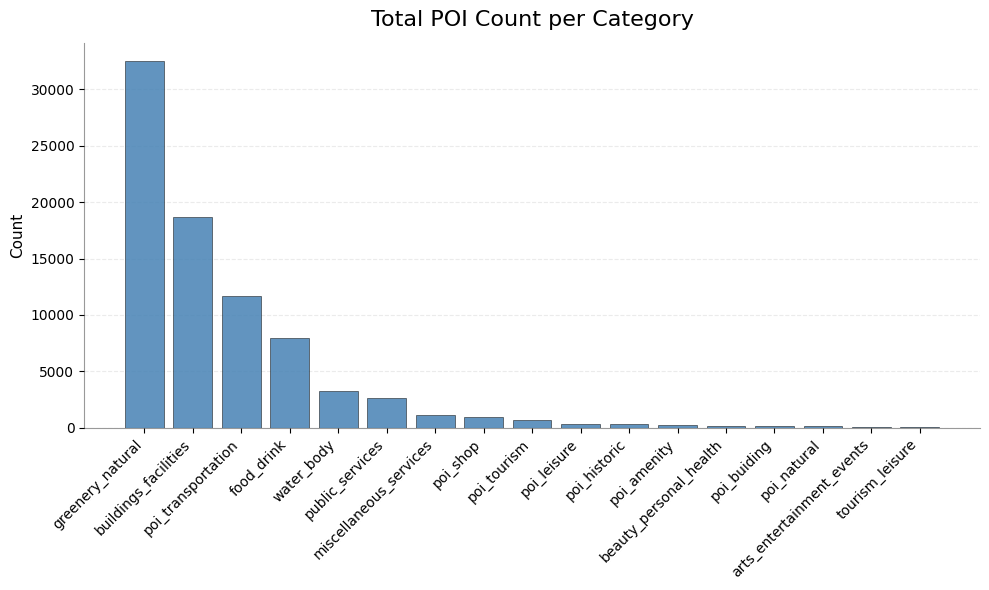

In [4]:
import matplotlib.pyplot as plt

poi_sums = df_poi[poi_cols].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(
    poi_sums.index,
    poi_sums.values,
    color="steelblue",
    edgecolor="black",
    linewidth=0.4,
    alpha=0.85
)

ax.set_title("Total POI Count per Category", fontsize=16, pad=12)
ax.set_ylabel("Count", fontsize=11)

ax.grid(True, linestyle="--", alpha=0.25, axis="y")
ax.set_axisbelow(True)

ax.tick_params(axis="x", labelrotation=45)
for label in ax.get_xticklabels():
    label.set_ha("right")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_alpha(0.4)
ax.spines["bottom"].set_alpha(0.4)

plt.tight_layout()
plt.show()


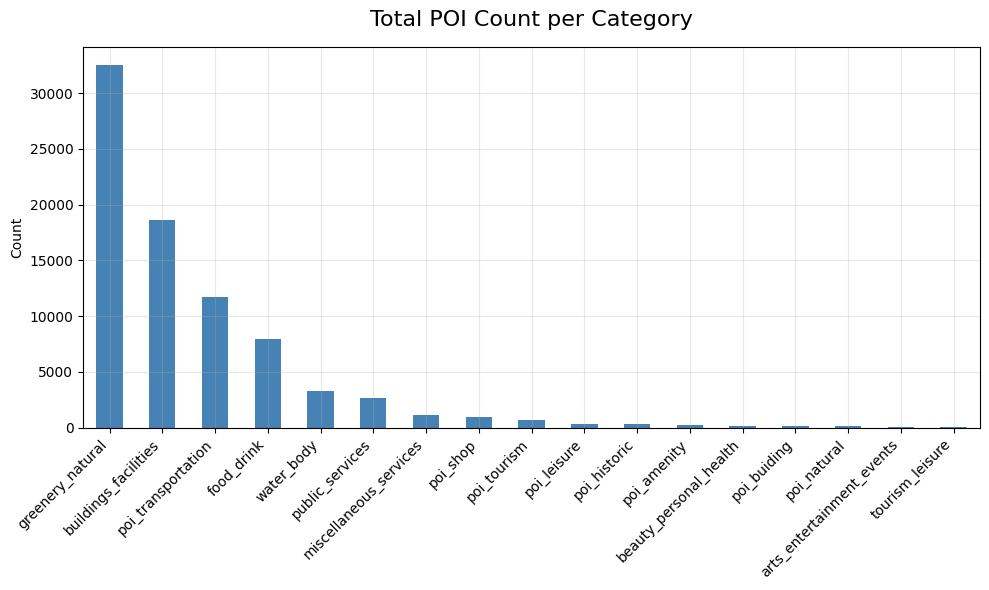

In [26]:
# Bar plot of total POI counts per category
import matplotlib.pyplot as plt

poi_sums = df_poi[poi_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
poi_sums.plot(kind="bar", color="steelblue")
plt.title("Total POI Count per Category", fontsize=16, pad=15)
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


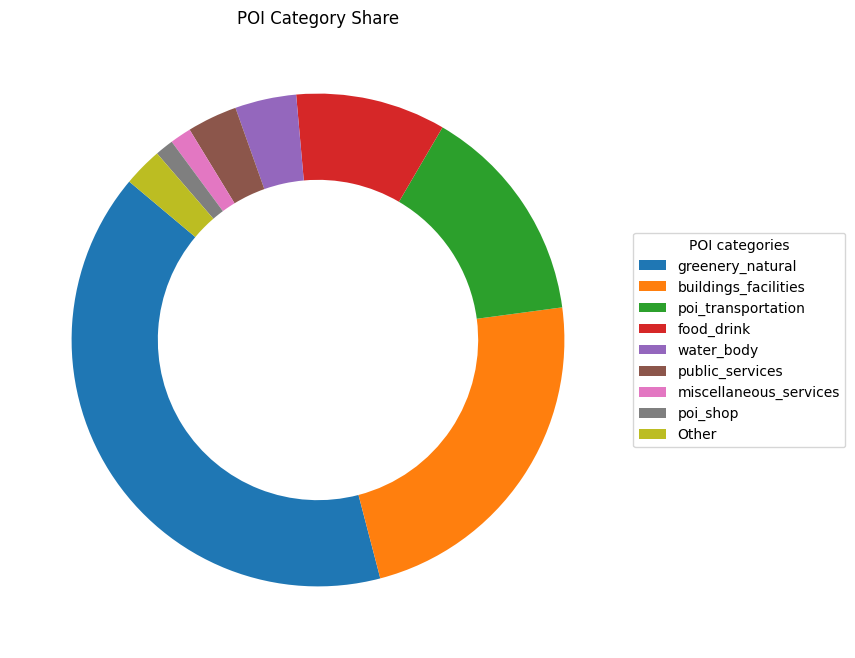

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Sum of each POI category
counts = df_poi[poi_cols].sum().sort_values(ascending=False)

# Keep Top 8 categories, group the rest into "Other"
top_n = 8
top_counts = counts[:top_n]
other_count = counts[top_n:].sum()

plot_counts = pd.concat([top_counts, pd.Series({"Other": other_count})])

# Labels and values
labels = plot_counts.index
sizes = plot_counts.values

# Plot
fig, ax = plt.subplots(figsize=(8, 8))

wedges, _ = ax.pie(
    sizes,
    wedgeprops=dict(width=0.35),
    startangle=140
)

ax.legend(
    wedges,
    labels,
    title="POI categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title("POI Category Share")
plt.show()


<Figure size 1000x1000 with 0 Axes>

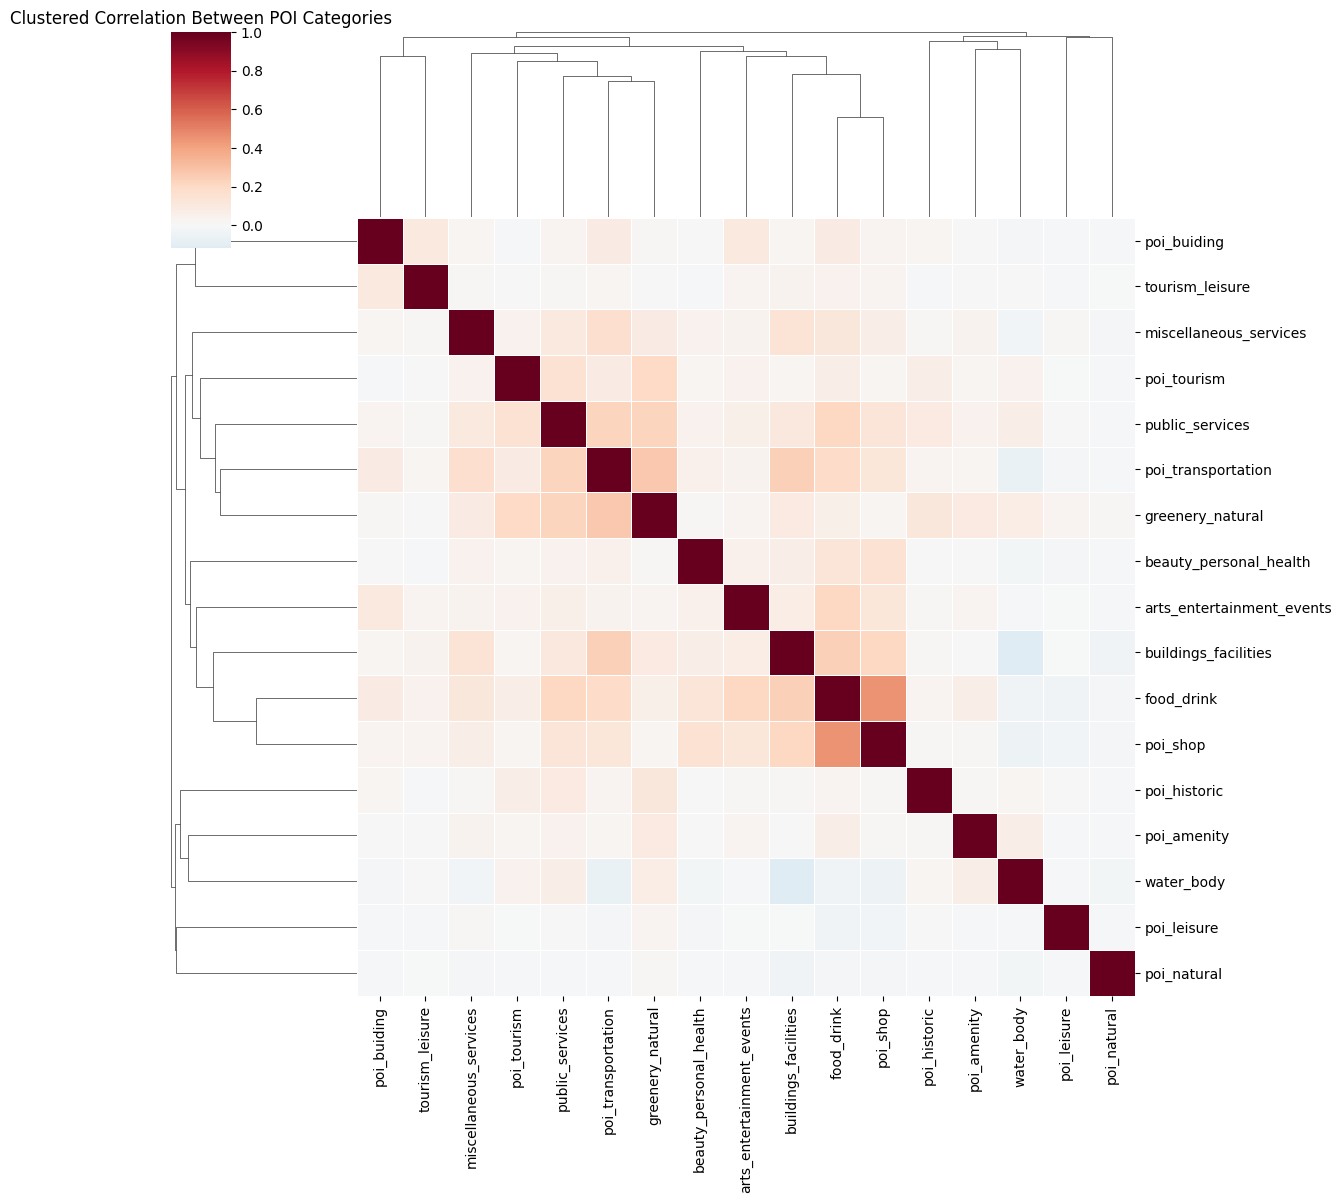

In [21]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.clustermap(
    corr_poi,
    cmap="RdBu_r",
    center=0,
    linewidths=0.5,
    figsize=(12,12)
)
plt.title("Clustered Correlation Between POI Categories")
plt.show()


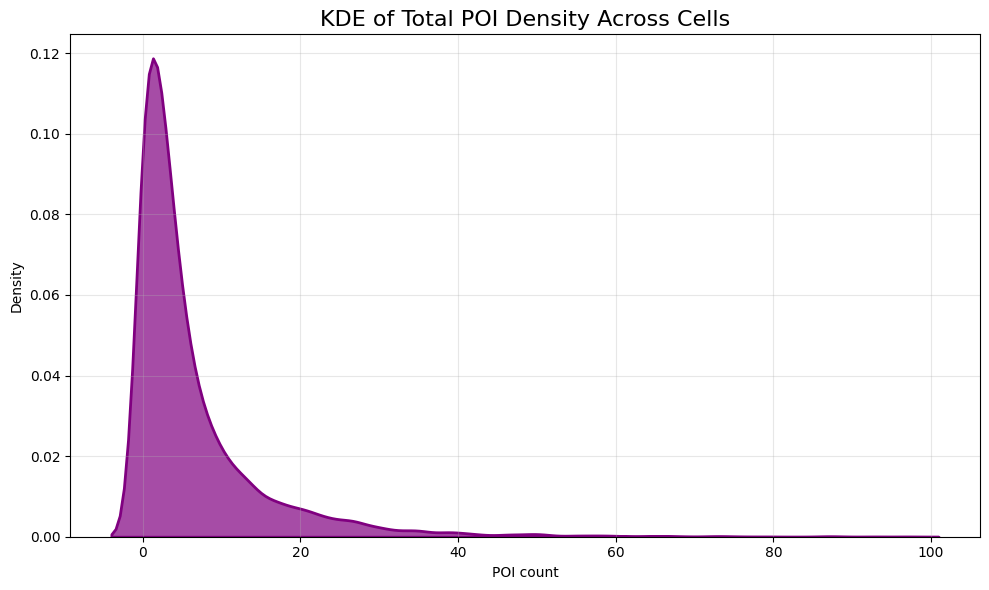

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.kdeplot(
    df_poi["poi_total"],
    fill=True,
    color="purple",
    alpha=0.7,
    linewidth=2
)

plt.title("KDE of Total POI Density Across Cells", fontsize=16)
plt.xlabel("POI count")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import RegularPolygon, Circle

fig, ax = plt.subplots(figsize=(6, 6))

# --- Draw hexagon ---
hexagon = RegularPolygon(
    (0, 0),
    numVertices=6,
    radius=1.0,
    orientation=np.pi / 6,
    edgecolor="black",
    facecolor="none",
    linewidth=2
)
ax.add_patch(hexagon)

# --- Draw centroid ---
ax.scatter(0, 0, color="black", s=40, zorder=3)
ax.text(0.02, -0.08, "Centroid", fontsize=10)

# --- Draw 50 m radius (schematic) ---
radius = Circle(
    (0, 0),
    radius=1.0,
    edgecolor="blue",
    facecolor="none",
    linestyle="--",
    linewidth=2
)
ax.add_patch(radius)
ax.text(0.9, 0.9, "50 m radius", color="blue", fontsize=10)

# --- POIs (inside = counted) ---
pois_inside = np.array([
    [0.3, 0.2],
    [-0.4, 0.1],
    [0.2, -0.5]
])

ax.scatter(
    pois_inside[:, 0],
    pois_inside[:, 1],
    color="green",
    s=60,
    label="POIs counted"
)

# --- POIs (outside = ignored) ---
pois_outside = np.array([
    [1.6, 0.3],
    [-1.5, -0.2]
])

ax.scatter(
    pois_outside[:, 0],
    pois_outside[:, 1],
    color="red",
    s=60,
    label="POIs ignored"
)

# --- Styling ---
ax.set_aspect("equal")
ax.axis("off")
ax.legend(loc="upper left", frameon=False)

# --- Save for LaTeX ---
fig.savefig(
    "/home/s232713/figures/poi_aggregation_schematic.pdf",
    bbox_inches="tight"
)
plt.close(fig)
